### 지도 학습과 비지도 학습  
  
머신러닝 알고리즘은 크게 **<font color=purple>지도학습</font>**<sup>supervised learning</sup>과 **<font color=purple>비지도 학습</font>**<sup>unsupervised learning</sup>으로 나눌 수 있다.  
  

지도 학습 : 입력과 타깃을 전달하여 모델을 훈련한 다음 새로운 데이터를 예측하는데에 활용. 입력과 타깃을 합쳐 훈련 데이터라고 부른다.  
비지도 학습 : 타깃 데이터가 없으며 따라서 무엇을 예측하는 것이 아니라 입력 데이터에서 어떤 특징을 찾는데에 주로 이용

### 훈련 세트와 테스트 세트  
  
머신러닝 알고리즘을의 성능을 제대로 평가하려면 훈련 데이터와 평가에 사용될 데이터가 각각 달라야 한다.  
이렇게 하는 가장 간단한 방법은 평가를 위해 또 다른 데이터를 준비하거나 이미 준비된 데이터 중에서 일부를 떼어 내어 활용하는 것이다.  
  
평가에 사용하는 데이터를 테스트 세트, 훈련에 사용되는 데이터를 훈련 세트라고 부른다.

In [3]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

총 49개의 샘플

In [4]:
fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

처음 35개를 훈련 세트로, 나머지 14개를 테스트 세트로 사용

In [5]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [6]:
print(fish_data[4])

[29.0, 430.0]


5번째 샘플 출력해보기

In [32]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


슬라이싱 연산을 사용하여 원소의 범위를 지정하여 출력해보기  
다만 마지막 인덱스의 원소는 포함되지 않는다 0~4까지의 5개의 원소를 선택하였기 때문에 실질적으로 인덱스 5인 여섯번째 원소는 선택되지 않음. 처음부터 시작되는 슬라이싱의 경우 0을 생략해 쓸 수 있다.

In [8]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [9]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [10]:
#훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
#훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]
#테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
#테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [11]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

당연히 훈련세트에 빙어가 하나도 존재하지 않아 해당 모델은 도미와 빙어를 분류할 수가 없다.
샘플링이 한쪽으로 치우쳐져 있는 상태로 **<font color=purple>샘플링 편향</font>**<sup>sampling bias</sup>이라고 한다.

### 넘파이  
**<font color=purple>넘파이</font>**<sup>numpy</sup>는 파이썬의 대표적인 배열<sup>array</sup>라이브러리이다. 앞서 파이썬의 리스트로 2차원 리스트를 표현할 수 있지만 고차원 리스트를 표현하려면 매우 번거롭다. 넘파이는 고차원의 배열을 손쉽게 만들고 조작할 수 있게 한다.  
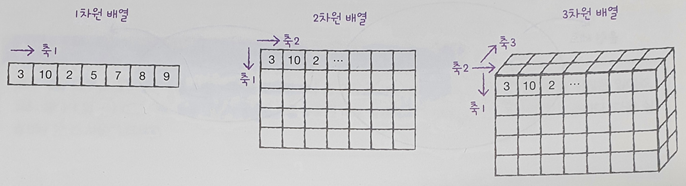

In [12]:
import numpy as np

넘파이 array() 함수에 파이썬 리스트를 전달하면 넘파이 배열로 변환된다.

In [13]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [14]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [15]:
print(input_arr.shape) #이 명령을 사용하면 (샘플 수, 특성 수)를 출력.

(49, 2)


#### ※ 무작위로 샘플을 고르는 방법으로 진행.  
#### 이때 주의할 점은 input_arr과 target_arr에서 같은 위치는 함께 선택되어야 한다는 점.  
#### 타깃과 샘플이 함께 골라지지 않으면 올바르게 훈련이 될 수 없다.

인덱스를 생성하여 섞은 다음 input_arr과 target_arr에서 샘플을 선택하면 무작위로 훈련 세트를 나누게 된다.

넘파이 arange() 함수를 사용하면 0에서부터 48까지 1씩 증가하는 인덱스를 간단히 만들 수 있다. 그 다음 이 인덱스를 랜덤하게 섞는다.

In [16]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

넘파이 arange()함수에 정수N을 전달하면 0부터 N-1까지 1씩 증가하는 배열을 생성.  
shuffle() 함수는 주어진 배열을 무작위로 섞는다.

In [17]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


#### 넘파이는 슬라이싱 외에 배열 인덱싱이라는 기능을 제공. 여러 개의 인덱스로, 한 번에 여러 개의 원소를 선택할 수 있다.

In [18]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


두번째와 네번쨰 샘플 출력해보기

#### 앞서 만든 index 배열의 처음 35개를 input_arr와 target_arr에 전달하여 랜덤하게 35개의 샘플을 훈련 세트로 설정

In [19]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [20]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


만들어진 index의 첫번째 값은 13이고 따라서 train_input의 첫 번째 원소는 input_arr의 열네 번쨰 원소가 들어있다. 그러므로 같은 값이 나온다.

In [21]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

나머지 14개를 테스트 세트로 생성

#### 잘 섞었는지 산점도를 그려보자

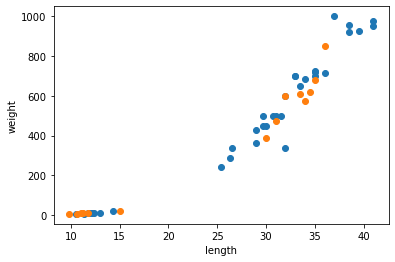

In [22]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1]) # train input의 모든 값인데, 첫번째 열을 x축에 두번째 열을 y축에 할당.
# 슬라이싱 연산자로 처음부터 마지막 원소까지 모두 선택하는 경우 시작과 종료 인덱스 모두 생략할 수 있다.
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

파란색이 훈련 세트이고 주황색이 테스트 세트이다.

#### 두 번째(제대로 된) 머신러닝 프로그램을 만들어보자

In [23]:
kn = kn.fit(train_input, train_target)

모델을 훈련

In [24]:
kn.score(test_input, test_target)

1.0

테스트 세트에 있는 모든 생선을 맞힌 결과 도출

In [25]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [26]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

테스트 인풋을 모델에 넣어 돌린 결과값과 실제 해당되는 샘플의 테스트 타겟값이 같음을 확인 가능.

predict() 메서드의 출력 결과가 test_target의 출력과 동일하게 array()로 감싸 있는 것을 볼 수 있으며 이는 넘파이 배열임을 의미. predict() 메서드가 반환하는 값은 파이썬 리스트가 아닌 넘파이 배열이다.  
사이킷런 모델의 입력과 출력은 모두 넘파이 배열이다.

### 마무리  
지도 학습 : 입력과 타깃을 전달하여 모델을 훈련한 다음 새로운 데이터를 예측하는데에 활용
비지도 학습 : 타깃 데이터가 없으며 따라서 무엇을 예측하는 것이 아니라 입력 데이터에서 어떤 특징을 찾는데에 주로 이용
훈련 세트 : 모델을 훈련할 때 사용하는 데이터
테스트 세트 : 전체 데이터에서 20~30%를 테스트 세트로 사용하는 것을 권장. 전체 데이터가 아주 크다면 1%만 덜어내어 테스트 해도 충분할 수 있다.

### numpy  
seed()는 넘파이에서 난수를 생성하기 위한 정수 초깃값을 지정. 초깃값이 같으면 동일한 난수를 뽑을 수 있다. 따라서 랜덤 함수의 결과를 동일하게 재현하고 싶을 때 사용한다.
arnage()는 일정한 간격의 정수 또는 실수 배열을 생성. 기본 간격은 1이며 매개변수가 하나이면 종료 숫자를 의미한다. 0에서 종료 숫자까지 배열을 만드며 
##### 종료 숫자는 배열에 미포함 된다.

In [27]:
print(np.arange(3))

[0 1 2]


In [28]:
print(np.arange(1,3))

[1 2]


In [29]:
print(np.arange(1,3,0.2))

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]


매개변수가 3개이면 마지막 매개변수가 간격을 나타낸다

In [30]:
arr = np.array([[1,2], [3,4], [5,6]])
np.random.shuffle(arr)
print(arr)

[[5 6]
 [1 2]
 [3 4]]


shuffle()은 주어진 배열을 랜덤하게 섞는다. 다차원 배열일 경우 첫 번째 축(행)에 대해서만 섞는다.